In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import WhiteKernel, ConstantKernel
import sklearn.gaussian_process as gp
from sklearn.gaussian_process.kernels import RBF, ExpSineSquared, RationalQuadratic

# data

In [2]:
PATH_NAME_CO2 = 'archive.csv'
train = pd.read_csv(PATH_NAME_CO2, encoding='CP949')

In [3]:
train

Year  Month  Decimal Date  Carbon Dioxide (ppm)  \
0    1958      1     1958.0411                   NaN   
1    1958      2     1958.1260                   NaN   
2    1958      3     1958.2027                315.69   
3    1958      4     1958.2877                317.45   
4    1958      5     1958.3699                317.50   
..    ...    ...           ...                   ...   
715  2017      8     2017.6219                   NaN   
716  2017      9     2017.7068                   NaN   
717  2017     10     2017.7890                   NaN   
718  2017     11     2017.8740                   NaN   
719  2017     12     2017.9562                   NaN   

     Seasonally Adjusted CO2 (ppm)  Carbon Dioxide Fit (ppm)  \
0                              NaN                       NaN   
1                              NaN                       NaN   
2                           314.42                    316.18   
3                           315.15                    317.30   
4                           314.73                    317.83   
..                             ...                       ...   
715                            NaN                       NaN   
716                            NaN                       NaN   
717                            NaN                       NaN   
718                            NaN                       NaN   
719                            NaN                       NaN   

     Seasonally Adjusted CO2 Fit (ppm)  
0                                  NaN  
1                                  NaN  
2                               314.89  
3                               314.98  
4                               315.06  
..                                 ...  
715                                NaN  
716                                NaN  
717                                NaN  
718                                NaN  
719                                NaN  

[720 rows x 7 columns]

In [4]:
train =train.dropna()
index = train.index
index = list(index)
train = train.to_numpy()

In [5]:
print("Total data shape is", train.shape)
print("The number of sample is ",len(train[0]))
co2 = train[:,3]

Total data shape is (702, 7)
The number of sample is  7


Text(0.5, 0, 'time series')

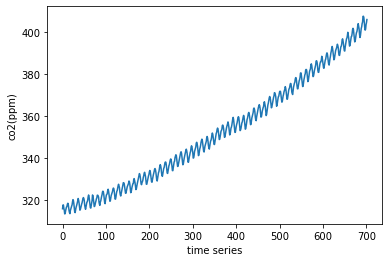

In [6]:
plt.plot(co2)
plt.ylabel('co2(ppm)')
plt.xlabel('time series')

# Train data and test data split

In [7]:
Full_x = []
for i in range(720):
    if i in index:
        Full_x.append(i)
    else:
        continue
        

In [8]:
Train_x = Full_x[:400]
Train_x = np.array(Train_x)
Train_x = np.atleast_2d(Train_x)
Train_x =Train_x.reshape((-1,1))

In [9]:
Train_y = co2[:400]

In [10]:
Train_y

array([315.69, 317.45, 317.5 , 315.86, 314.93, 313.21, 313.33, 314.67,
       315.58, 316.48, 316.65, 317.72, 318.29, 318.15, 316.54, 314.8 ,
       313.84, 313.34, 314.81, 315.58, 316.43, 316.97, 317.58, 319.03,
       320.03, 319.59, 318.18, 315.9 , 314.17, 313.83, 315.  , 316.19,
       316.9 , 317.7 , 318.54, 319.48, 320.58, 319.77, 318.57, 316.79,
       314.99, 315.31, 316.1 , 317.01, 317.94, 318.55, 319.68, 320.57,
       321.01, 320.62, 319.61, 317.4 , 316.25, 315.42, 316.69, 317.7 ,
       318.74, 319.07, 319.86, 321.39, 322.25, 321.48, 319.74, 317.77,
       316.21, 315.99, 317.06, 318.35, 319.57, 322.26, 321.89, 320.44,
       318.69, 316.71, 316.87, 317.68, 318.71, 319.44, 320.44, 320.89,
       322.14, 322.16, 321.87, 321.21, 318.87, 317.82, 317.3 , 318.87,
       319.42, 320.62, 321.59, 322.39, 323.7 , 324.08, 323.75, 322.39,
       320.36, 318.64, 318.1 , 319.79, 321.03, 322.32, 322.5 , 323.04,
       324.42, 325.  , 324.09, 322.55, 320.92, 319.25, 319.39, 320.72,
      

In [11]:
Train_x

array([[  2],
       [  3],
       [  4],
       [  6],
       [  7],
       [  8],
       [ 10],
       [ 11],
       [ 12],
       [ 13],
       [ 14],
       [ 15],
       [ 16],
       [ 17],
       [ 18],
       [ 19],
       [ 20],
       [ 21],
       [ 22],
       [ 23],
       [ 24],
       [ 25],
       [ 26],
       [ 27],
       [ 28],
       [ 29],
       [ 30],
       [ 31],
       [ 32],
       [ 33],
       [ 34],
       [ 35],
       [ 36],
       [ 37],
       [ 38],
       [ 39],
       [ 40],
       [ 41],
       [ 42],
       [ 43],
       [ 44],
       [ 45],
       [ 46],
       [ 47],
       [ 48],
       [ 49],
       [ 50],
       [ 51],
       [ 52],
       [ 53],
       [ 54],
       [ 55],
       [ 56],
       [ 57],
       [ 58],
       [ 59],
       [ 60],
       [ 61],
       [ 62],
       [ 63],
       [ 64],
       [ 65],
       [ 66],
       [ 67],
       [ 68],
       [ 69],
       [ 70],
       [ 71],
       [ 72],
       [ 76],
       [ 77],
      

# Guassian Process Regressing

# parameter optimizing 1

/Users/munjungkim/opt/anaconda3/lib/python3.8/site-packages/sklearn/gaussian_process/_gpr.py:504: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


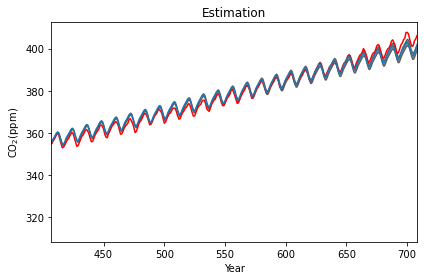

In [12]:
# you should use periodic kernel
#period p determines the distance between repititions of the function
# l 

import sklearn.gaussian_process as gp
from sklearn.gaussian_process.kernels import RBF, ExpSineSquared, RationalQuadratic , Exponentiation,DotProduct


k1 =  gp.kernels.ConstantKernel(1.0, (1e-1, 1e3)) * RBF(length_scale=1.0,length_scale_bounds=(1e-5,1e-1))
k2 =  gp.kernels.ConstantKernel(1.0, (1e-1, 1e3))*  RBF(length_scale=2000.0,length_scale_bounds=(1e3,1e4))*ExpSineSquared(length_scale=12.0, periodicity=12.0,periodicity_bounds="fixed")


k3 = gp.kernels.ConstantKernel(1.0, (1e-3, 1e1)) * RationalQuadratic(length_scale=1.0,length_scale_bounds=(1e-4,1e-1), alpha=0.78)


model = GaussianProcessRegressor(kernel=k1+k2+k3,n_restarts_optimizer=10, alpha=0.1)
model.fit(Train_x, Train_y)


X_ = Full_x[400:]
X_ = np.array(X_)
X_ = np.atleast_2d(X_)
X_ = X_.reshape((-1,1))
y_pred, y_std = model.predict(X_, return_std=True)

plt.plot(Full_x[400:],co2[400:],c='r')
plt.plot(Train_x, Train_y, c='k')
plt.plot(X_, y_pred)
plt.fill_between(X_[:, 0], y_pred - y_std, y_pred + y_std,
                 alpha=0.5, color='k')
plt.xlim(X_.min(), X_.max())
plt.xlabel("Year")
plt.ylabel(r"CO$_2$(ppm)")
plt.title("Estimation")
plt.tight_layout()
plt.show()

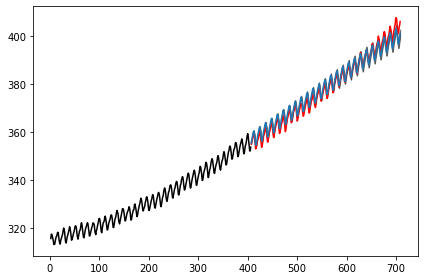

In [13]:
plt.plot(Train_x, Train_y, c='k')
plt.plot(Full_x[400:],co2[400:],c='r')
plt.plot(X_, y_pred)
plt.fill_between(X_[:, 0], y_pred - y_std, y_pred + y_std,
                 alpha=0.5, color='k')
plt.tight_layout()

In [14]:
print("\nLearned kernel: %s" % model.kernel_)
print("Log-marginal-likelihood: %.3f"
      % model.log_marginal_likelihood(model.kernel_.theta))


Learned kernel: 0.316**2 * RBF(length_scale=0.0615) + 31.6**2 * RBF(length_scale=1e+03) * ExpSineSquared(length_scale=7.01, periodicity=12) + 3.16**2 * RationalQuadratic(alpha=0.000333, length_scale=0.1)
Log-marginal-likelihood: -380.630


# parameter optimizing 2

In [ ]:
# you should use periodic kernel
#period p determines the distance between repititions of the function
# l 

import sklearn.gaussian_process as gp
from sklearn.gaussian_process.kernels import RBF, ExpSineSquared, RationalQuadratic , Exponentiation,DotProduct



k1 =  gp.kernels.ConstantKernel(1.0, (1e-1, 1e3)) * RBF(length_scale=1.0,length_scale_bounds=(1e3,1e4))
k2 =  gp.kernels.ConstantKernel(1.0, (1e-1, 1e3))*  RBF(length_scale=2000.0,length_scale_bounds=(1e3,1e4))*ExpSineSquared(length_scale=12.0, periodicity=12.0,periodicity_bounds="fixed")

k3 = gp.kernels.ConstantKernel(1.0, (1e-3, 1e1)) * RationalQuadratic(length_scale=1.0,length_scale_bounds=(1e2,1e3), alpha=0.78)

k4 = gp.kernels.ConstantKernel(1.0,(1e-3, 1)) * RBF(length_scale=1,length_scale_bounds=(1e-2,1e-1)) * WhiteKernel(noise_level=0.1**2,noise_level_bounds=(1e-5, 1e10)) 

model = GaussianProcessRegressor(kernel=k1+k2+k3+k4, n_restarts_optimizer=10,alpha=0.0)
model.fit(Train_x, Train_y)


X_ = Full_x[400:]
X_ = np.array(X_)
X_ = np.atleast_2d(X_)
X_ = X_.reshape((-1,1))
y_pred, y_std = model.predict(X_, return_std=True)

plt.plot(Full_x[400:],co2[400:],c='r')
plt.plot(Train_x, Train_y, c='k')
plt.plot(X_, y_pred)
plt.fill_between(X_[:, 0], y_pred - y_std, y_pred + y_std,
                 alpha=0.5, color='k')
plt.xlim(X_.min(), X_.max())
plt.xlabel("Year")
plt.ylabel(r"CO$_2$(ppm)")
plt.title("Estimation")
plt.tight_layout()
plt.show()

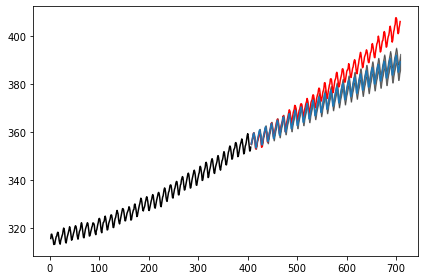

In [16]:
plt.plot(Train_x, Train_y, c='k')
plt.plot(Full_x[400:],co2[400:],c='r')
plt.plot(X_, y_pred)
plt.fill_between(X_[:, 0], y_pred - y_std, y_pred + y_std,
                 alpha=0.5, color='k')
plt.tight_layout()

In [132]:
print("\nLearned kernel: %s" % model.kernel_)



Learned kernel: 31.6**2 * RBF(length_scale=1e+03) + 31.6**2 * RBF(length_scale=8.95e+03) * ExpSineSquared(length_scale=2.99, periodicity=12) + 3.16**2 * RationalQuadratic(alpha=0.00801, length_scale=100) + 0.999**2 * RBF(length_scale=0.1) * WhiteKernel(noise_level=0.0616)


# following reference 

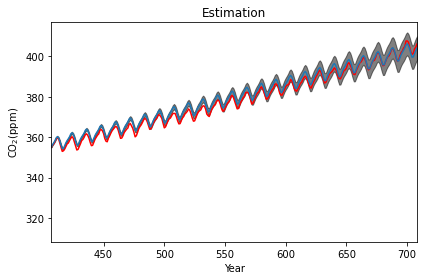

In [121]:
#reference : https://scikit-learn.org/stable/auto_examples/gaussian_process/plot_gpr_co2.html


import sklearn.gaussian_process as gp
from sklearn.gaussian_process.kernels import RBF, ExpSineSquared, RationalQuadratic , Exponentiation,DotProduct
kernel = gp.kernels.ConstantKernel(1.0, (1e-1, 1e3)) * gp.kernels.ExpSineSquared(10.0, (1e-3, 1e3))


k1 = 50.0**2 * RBF(length_scale=50.0)  # long term smooth rising trend
k2 = 2.0**2 * RBF(length_scale=100.0) \
    * ExpSineSquared(length_scale=1.0, periodicity=12.0,
                     periodicity_bounds="fixed")  # seasonal component
# medium term irregularities
k3 = 0.5**2 * RationalQuadratic(length_scale=1.0,length_scale_bounds=(1e1,1e4), alpha=1.0)
k4 = 0.1**2 * RBF(length_scale=0.1) \
    + WhiteKernel(noise_level=0.1**2,
                  noise_level_bounds=(1e-5, np.inf))  # noise terms
kernel = k1 + k2 + k3 + k4


model = GaussianProcessRegressor(kernel=k1+k2+k3+k4,alpha=0.0)
model.fit(Train_x, Train_y)





X_ = Full_x[400:]
X_ = np.array(X_)
X_ = np.atleast_2d(X_)
X_ = X_.reshape((-1,1))
y_pred, y_std = model.predict(X_, return_std=True)

plt.plot(Full_x[400:],co2[400:],c='r')
plt.plot(Train_x, Train_y, c='k')
plt.plot(X_, y_pred)
plt.fill_between(X_[:, 0], y_pred - y_std, y_pred + y_std,
                 alpha=0.5, color='k')
plt.xlim(X_.min(), X_.max())
plt.xlabel("Year")
plt.ylabel(r"CO$_2$(ppm)")
plt.title("Estimation")
plt.tight_layout()
plt.show()

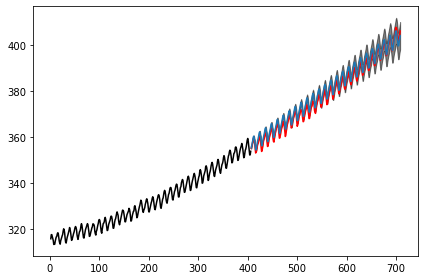

In [116]:
plt.plot(Train_x, Train_y, c='k')
plt.plot(Full_x[400:],co2[400:],c='r')
plt.plot(X_, y_pred)
plt.fill_between(X_[:, 0], y_pred - y_std, y_pred + y_std,
                 alpha=0.5, color='k')
plt.tight_layout()

In [117]:
print("\nLearned kernel: %s" % model.kernel_)


Learned kernel: 316**2 * RBF(length_scale=1.27e+03) + 3.12**2 * RBF(length_scale=1.99e+03) * ExpSineSquared(length_scale=1.4, periodicity=12) + 49.9**2 * RationalQuadratic(alpha=1e-05, length_scale=315) + 0.127**2 * RBF(length_scale=0.1) + WhiteKernel(noise_level=0.0161)
